Question 1

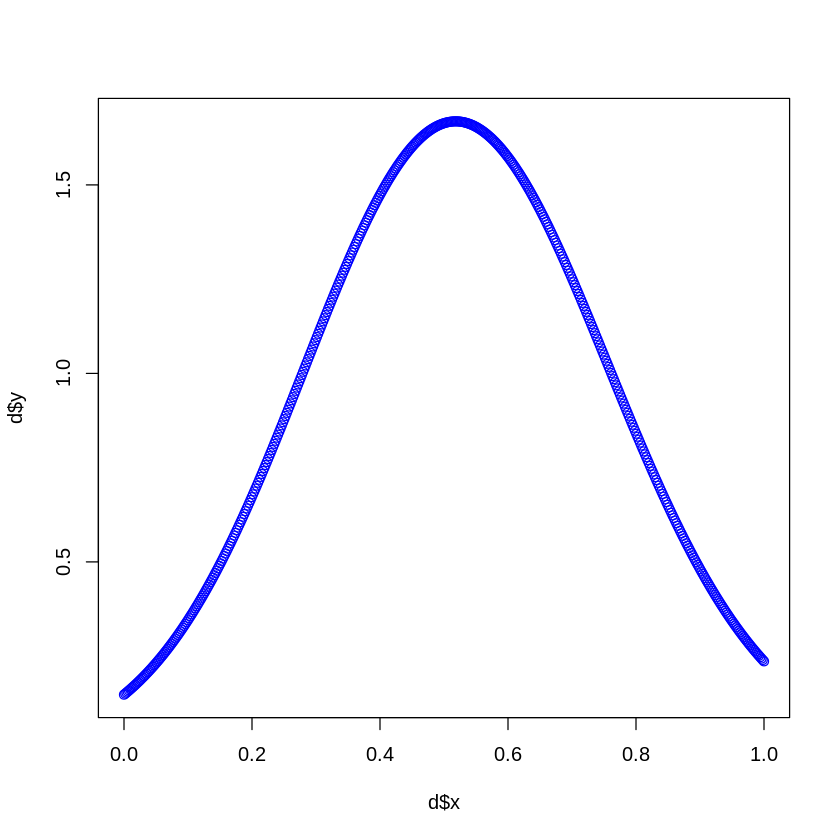

In [ ]:
f = function(y) {
  x = 1
  n = 10
  # exp(-(x-theta)^2/(2*(1/n)))*exp(-(theta-1)^2/2)/(sqrt(2*pi*(1/n)*2*pi))
  2*exp(-(x-(y^-1-1))^2/(2*n^-1))*exp(-(y^-1-1-1)^2/(2*1))*y^-2/(sqrt(2*pi*n^-1*2*pi))
}

importance_sampling2 = function(x) {
  wTilde=f(x)/dnorm(x, 0, 1) # get weights 
  return (wTilde/sum(wTilde)) # normalize weights
}

n = 1000
y = rnorm(n, 1,1)
w = importance_sampling2(y)
d = density(y, weights = w, from = 0, to = 1)

plot(d$x, d$y, col = 'blue')

In [ ]:
d


Call:
	density.default(x = y, weights = w, from = 0, to = 1)

Data: y (1000 obs.);	Bandwidth 'bw' = 0.2231

       x              y         
 Min.   :0.00   Min.   :0.1478  
 1st Qu.:0.25   1st Qu.:0.4858  
 Median :0.50   Median :0.9612  
 Mean   :0.50   Mean   :0.9599  
 3rd Qu.:0.75   3rd Qu.:1.4529  
 Max.   :1.00   Max.   :1.6686  

In [ ]:
get_real_value = function() {
  x = 1
  n = 10
  (sqrt(n+1)*exp(-0.5*((n*x+1)^2/(n+1)-1)))^-1
}


real_val = get_real_value()
real_val

[1] 44.74825

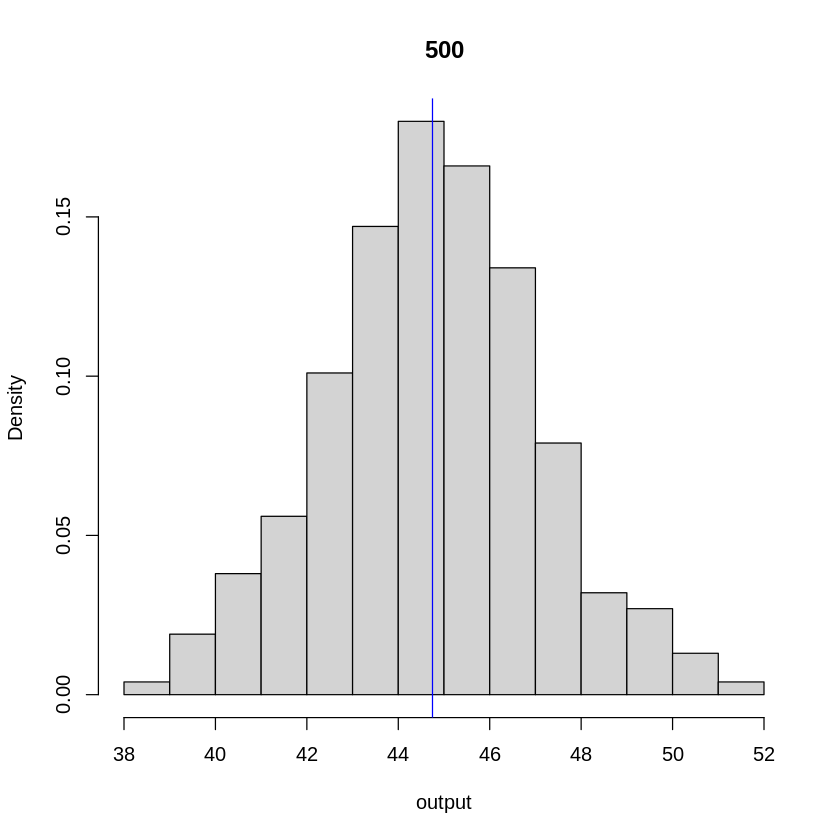

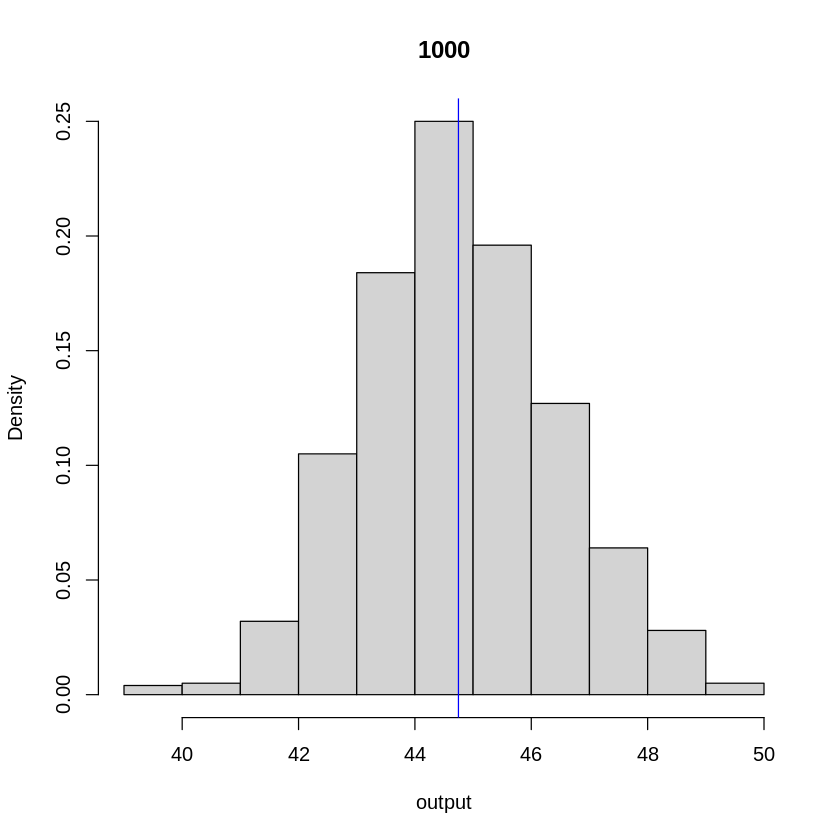

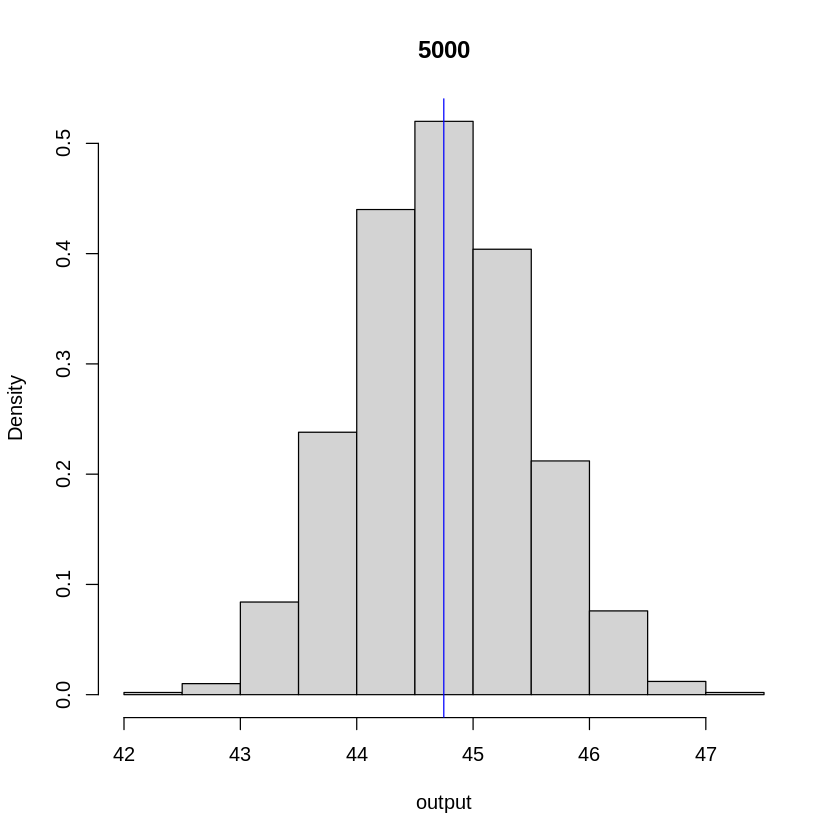

In [ ]:
tests = c(500, 1000, 5000)

monte_carlo = function(N, xbar, n, m = 1, a = 1) {

  # num
  theta = rnorm(N, m, a) # from prior 
  w = dnorm(xbar, theta, sqrt(1/n))*dnorm(theta,1,1)/dnorm(theta,1,1)
  num = w

  mean(num)

  # denom
  denom = dnorm(xbar, 0, sqrt(1/n))


  # w=dnorm(xbar,theta,1/sqrt(10))*dnorm(theta,1,1) /dnorm(theta,true.mean,a[j]*true.sd)

  mean(num)/denom
}


for(i in tests){
  output = NULL
  
  for (j in 1:1000) { 

    N  = i
    xbar = 1
    n = 10

    output = c(output, monte_carlo(N, xbar, n))
  }
  hist(output, prob = T, main = i)
  abline(v=real_val, col="blue")
}

c

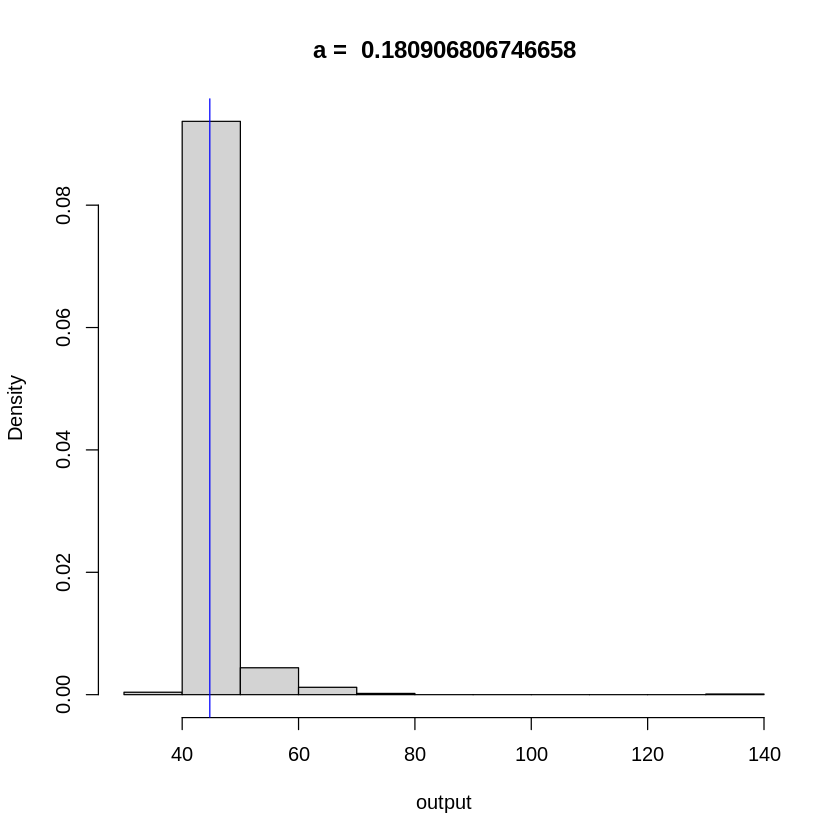

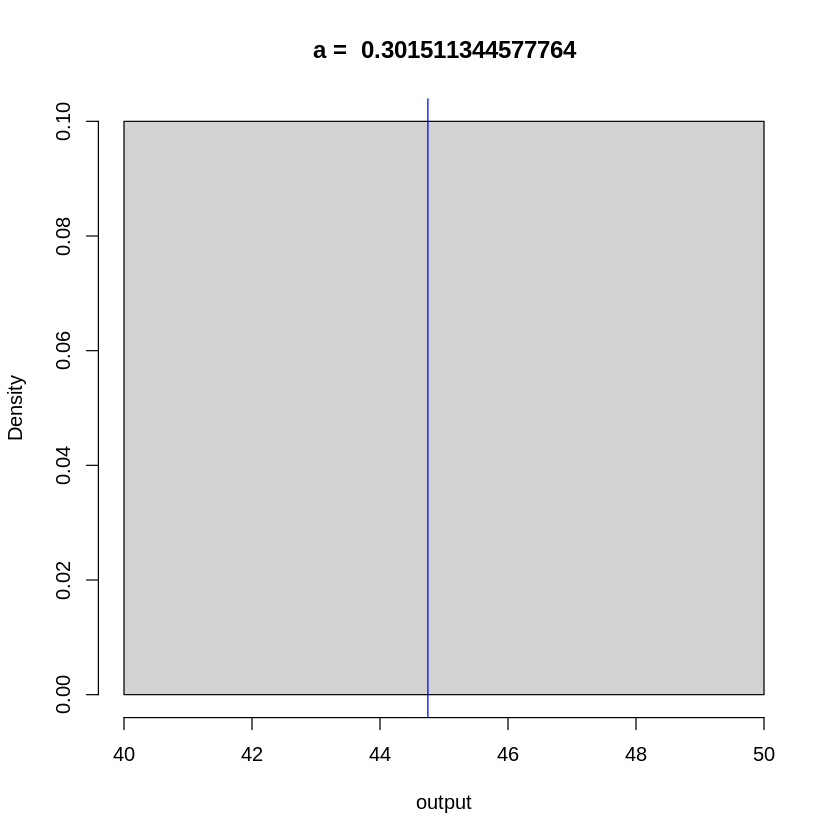

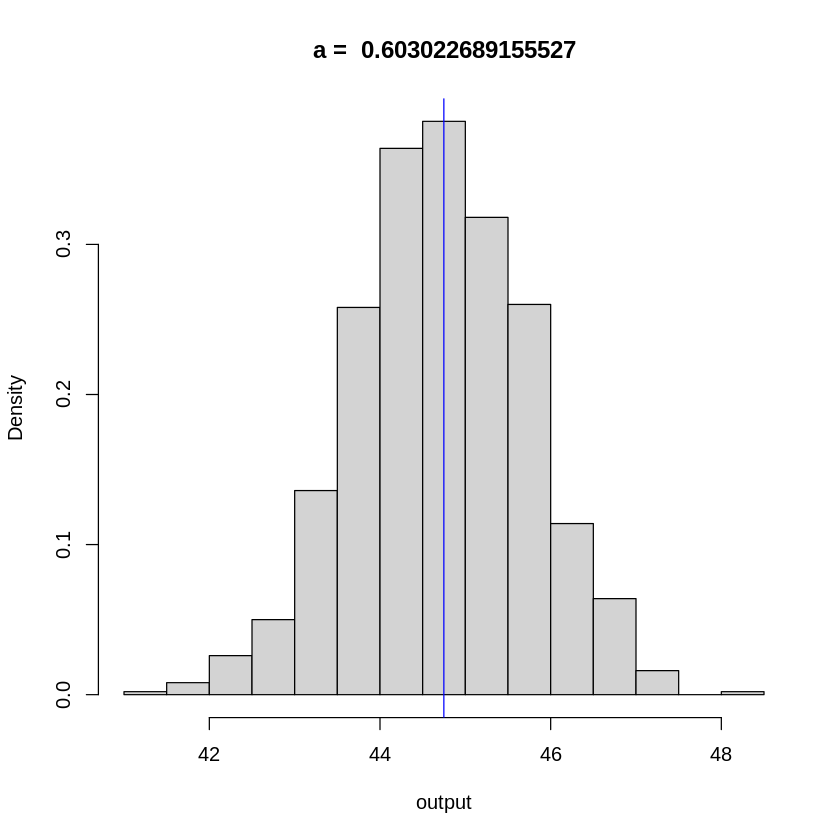

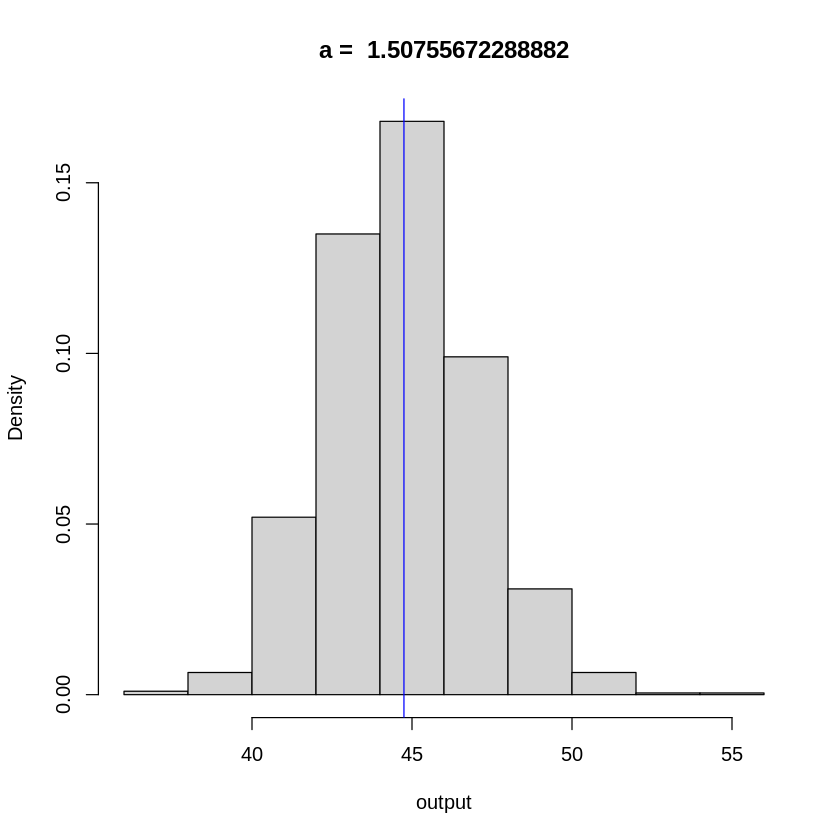

In [ ]:
As = c(0.6/sqrt(11),1/sqrt(11),2/sqrt(11), 5/sqrt(11))

monte_carlo_new = function(N, xbar, n, m = 1, a = 1) {

  # num
  theta = rnorm(N, m, a) # from prior 
  w = dnorm(xbar, theta, sqrt(1/n))*dnorm(theta,1,1)/dnorm(theta, m, a)
  num = w

  # denom
  denom = dnorm(xbar, 0, sqrt(1/n))
  # print(denom)

  mean(num)/denom
}


for(a in As) {

  output = NULL
  for (j in 1:1000) { 

    N  = 1000
    xbar = 1
    n = 10

    output = c(output, monte_carlo_new(N, xbar, n,  m = 1, a = a))
    
  }

  hist(output, prob = T, main = paste("a = ", a))
  abline(v=real_val, col="blue")
}


when g(x) matches f(x) we can maximises ESS. As a result when we choose distributions such as ~N(1, 1.50...) we can maximise ESS and produce a good sampling mechanism. 

The choice of g(x) is better when the variance is a better match for the variance of Xi ~ N(thetha, 1). That is when the variance is closer to 1 g(x) is a better choice.

Question 2

In [ ]:
get_real_value()^-1

[1] 0.02234724

In [ ]:
monte_carlo(N = 1000, xbar = 1, n = 10)^-1

[1] 0.02288548

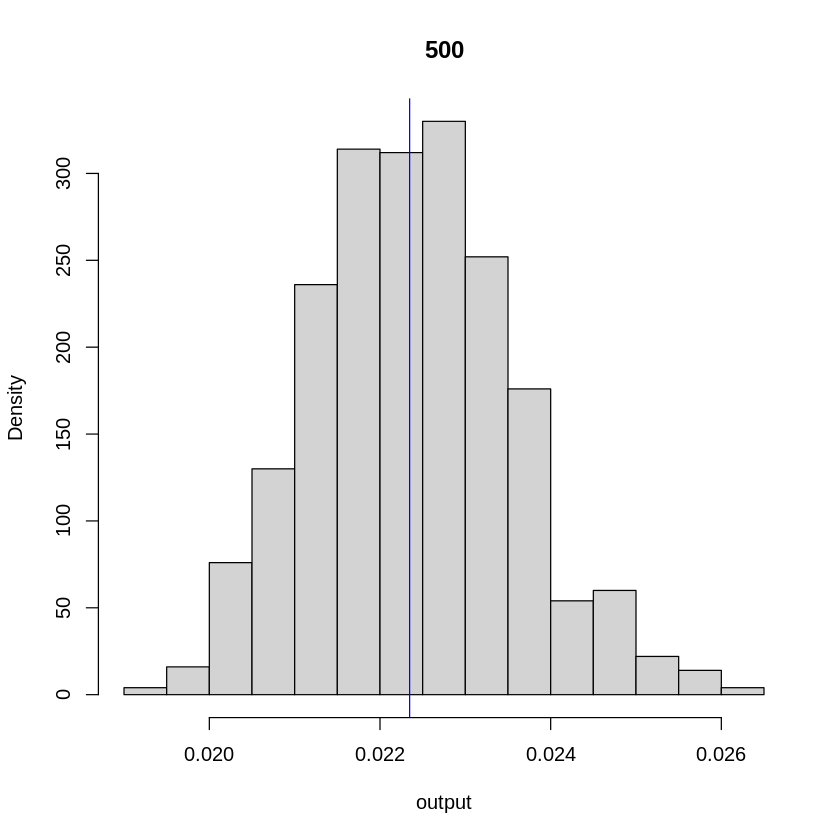

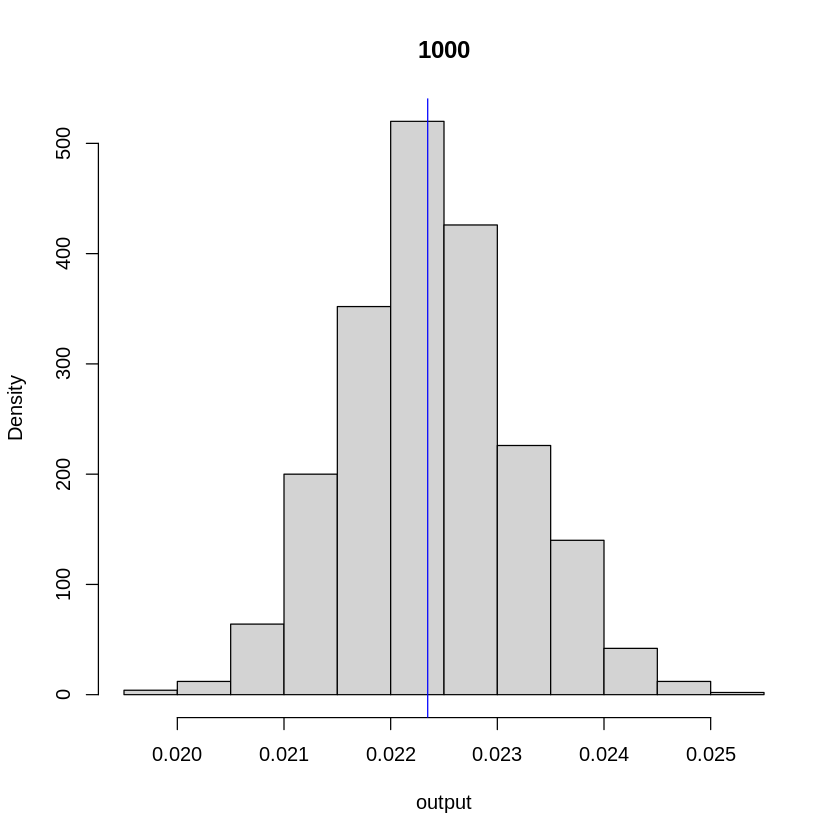

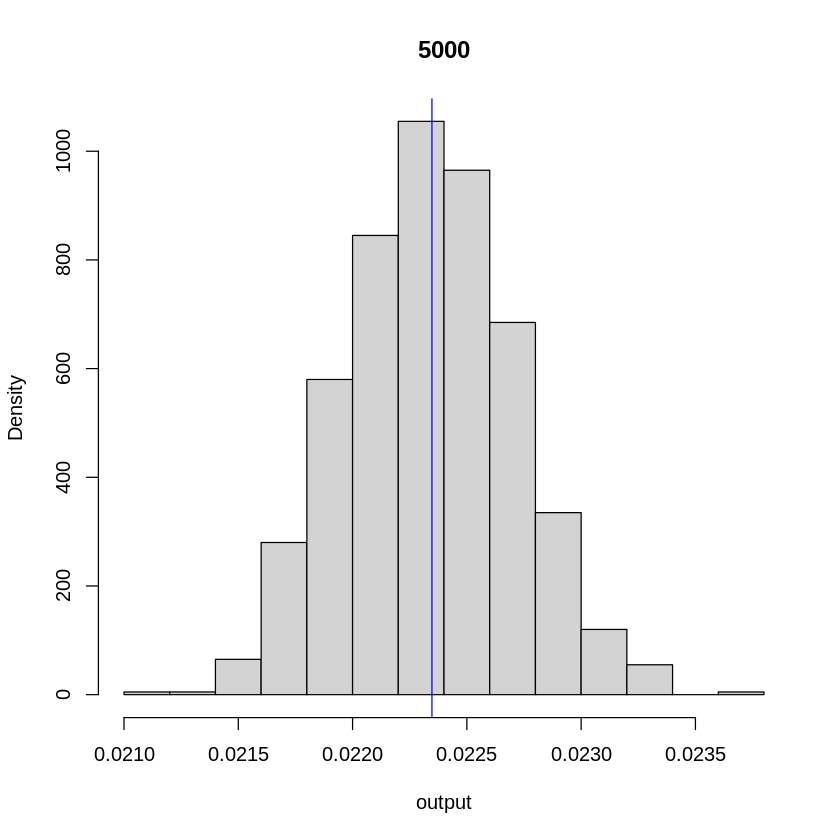

In [ ]:
tests = c(500, 1000, 5000)
for(i in tests){
  output = NULL
  
  for (j in 1:1000) { 

    N  = i
    xbar = 1
    n = 10

    output = c(output, monte_carlo(N, xbar, n)^-1)
  }
  hist(output, prob = T, main = i)
  abline(v=real_val^-1, col="blue")
}

redo

question 1

In [ ]:
# (a)

N = 1e3
n = 10
x_bar = 1


m0 = function(theta) {
  (exp(-(x_bar - theta)^2/(2/n)) * exp(-(theta - 1)^2/(2)))/(sqrt(2*pi*(1/n)*2*pi))
}

m1 = function() {
  (exp(-(x_bar - 0)^2/(2/n)))/(sqrt(2*pi*(1/n)))
}


true = function() {
  (sqrt(n+1)*exp(-0.5*((n*x_bar + 1)^2/(n+1) -1)))^-1
}

y = rnorm(N, 1, 1)
num = m0(y)/dnorm(y, 1, 1)
denom = m1()

mean(num/denom)
true()

[1] 46.55739

[1] 44.74825

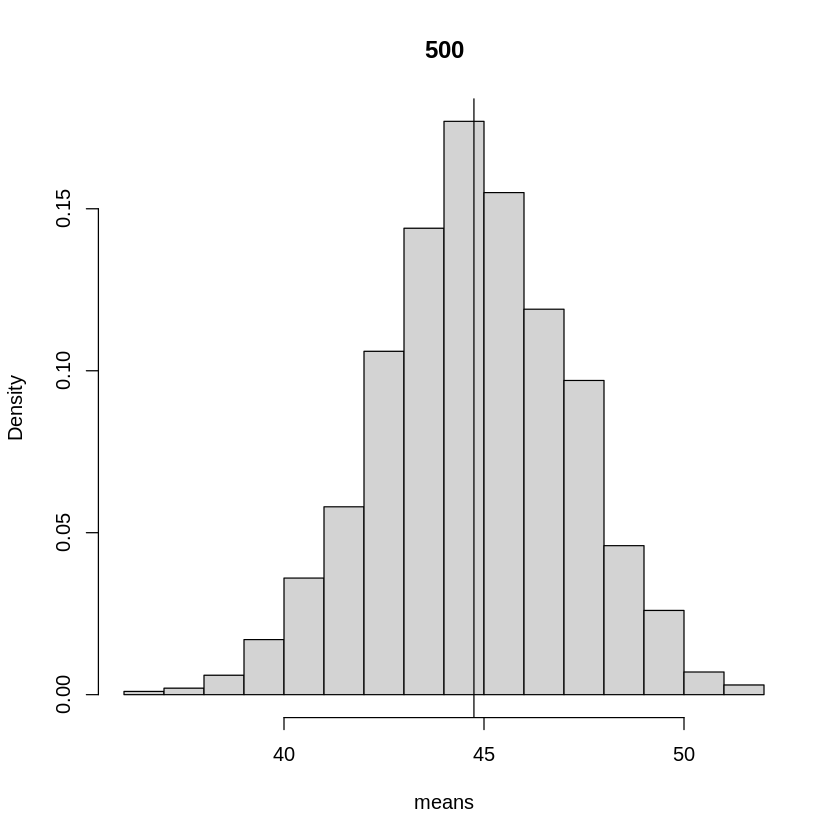

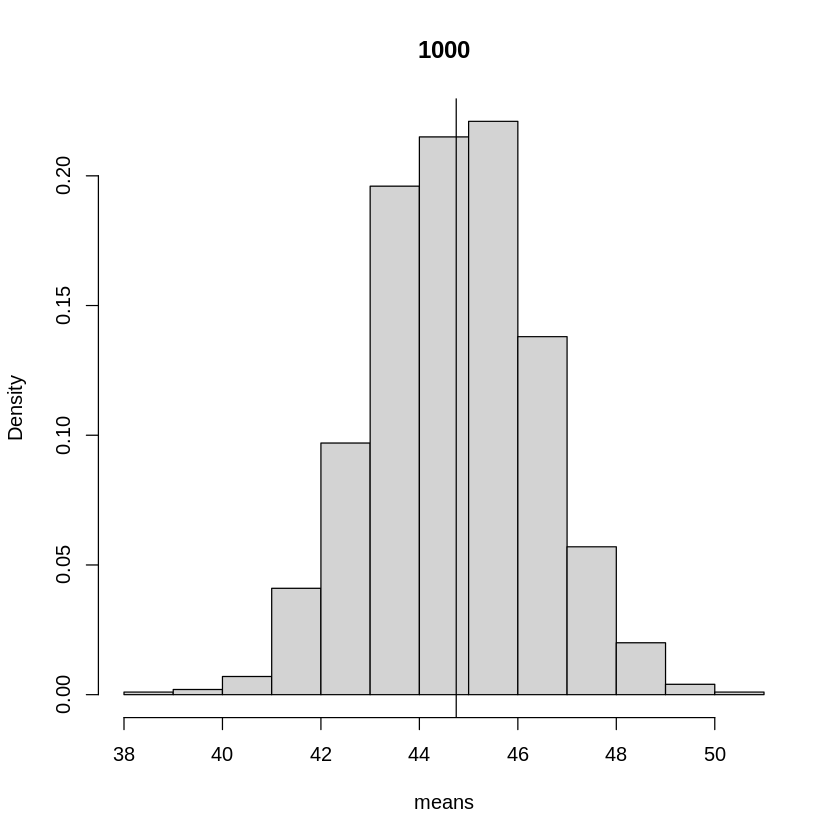

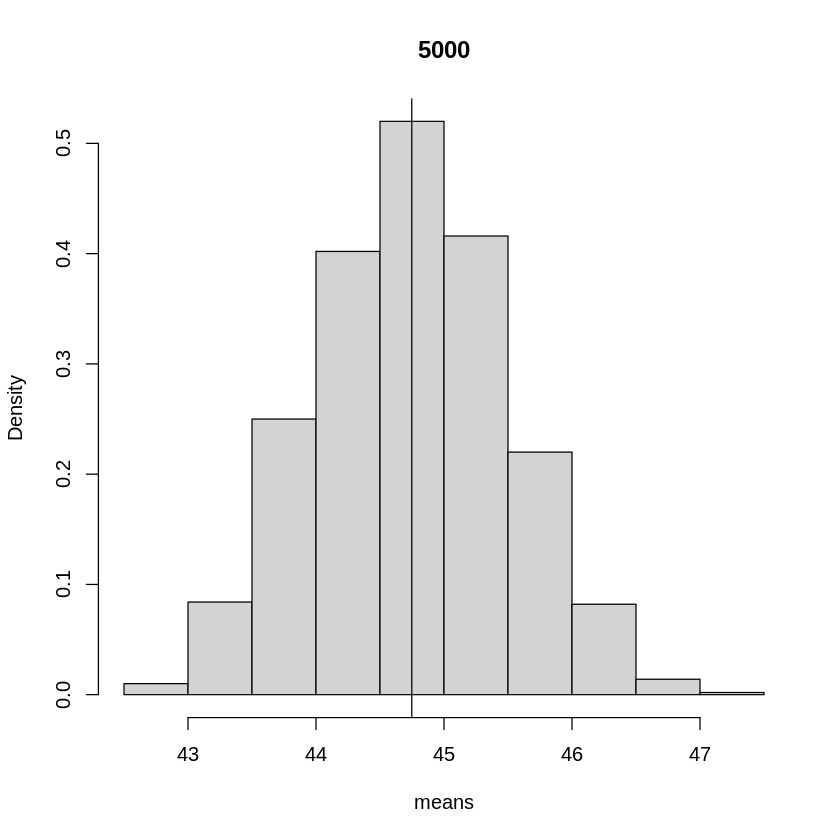

In [ ]:
# (b)

Ns = c(500, 1000, 5000)


for (i in Ns){ 

  means = NULL

  for (j in 1:1000) {

    y = rnorm(i, 1, 1)
    num = m0(y)/dnorm(y, 1, 1)
    denom = m1()

    est = mean(num/denom)
    means = c(means, est)
    

  }
  hist(means, main = as.character(i), prob = T)
  abline(v = true())
  
}



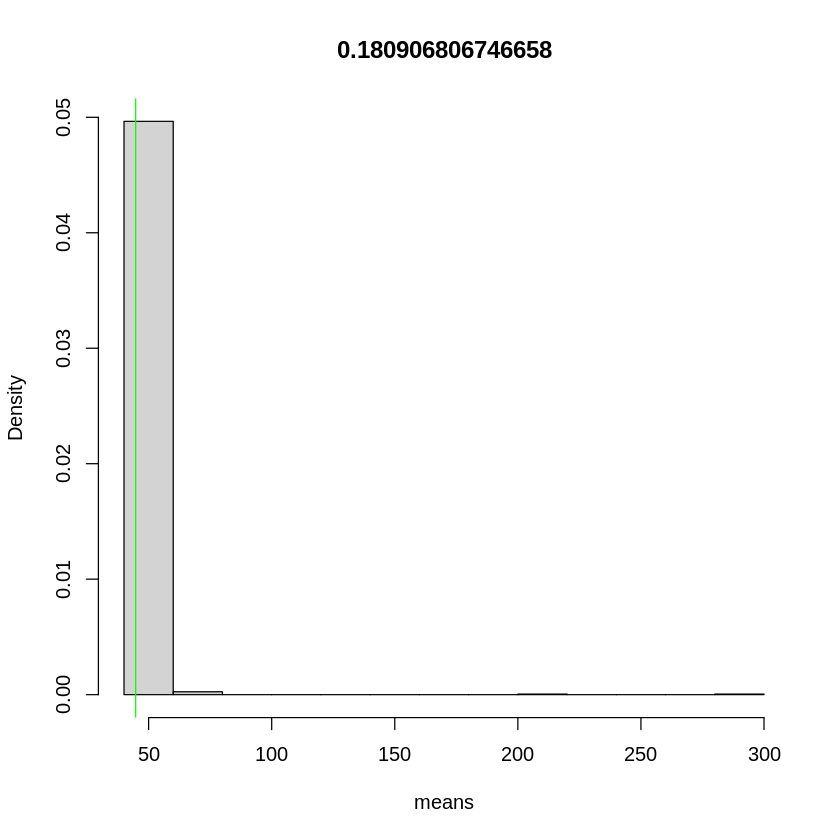

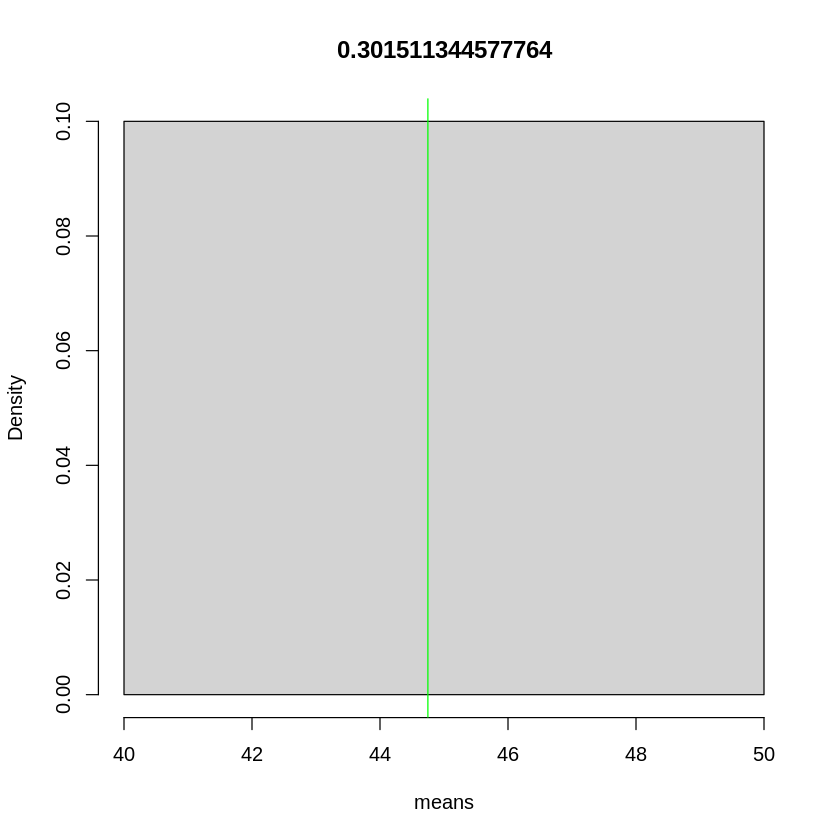

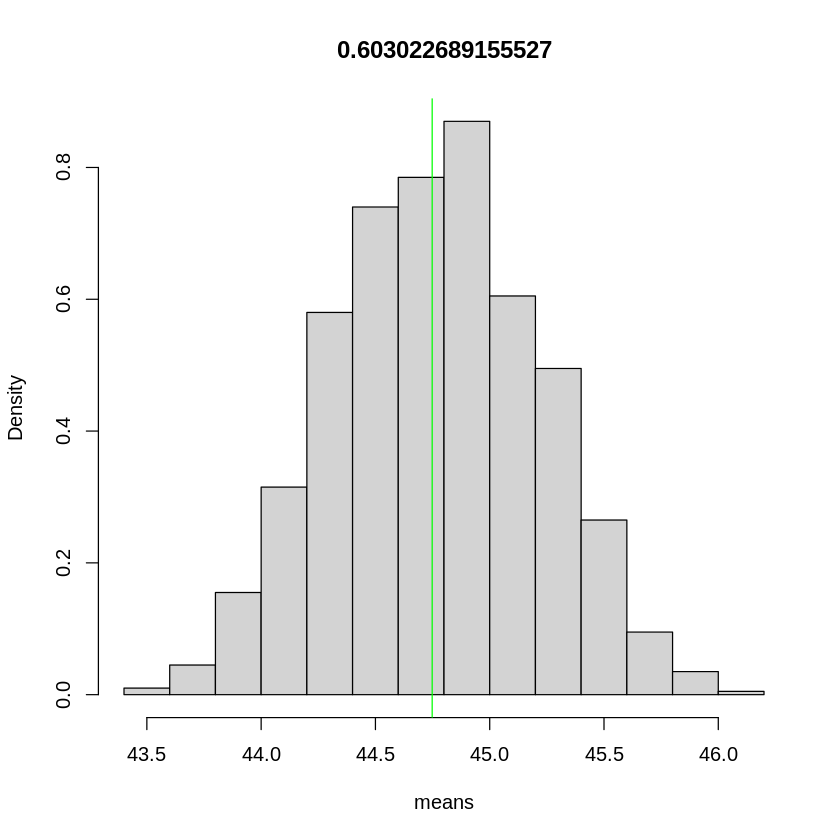

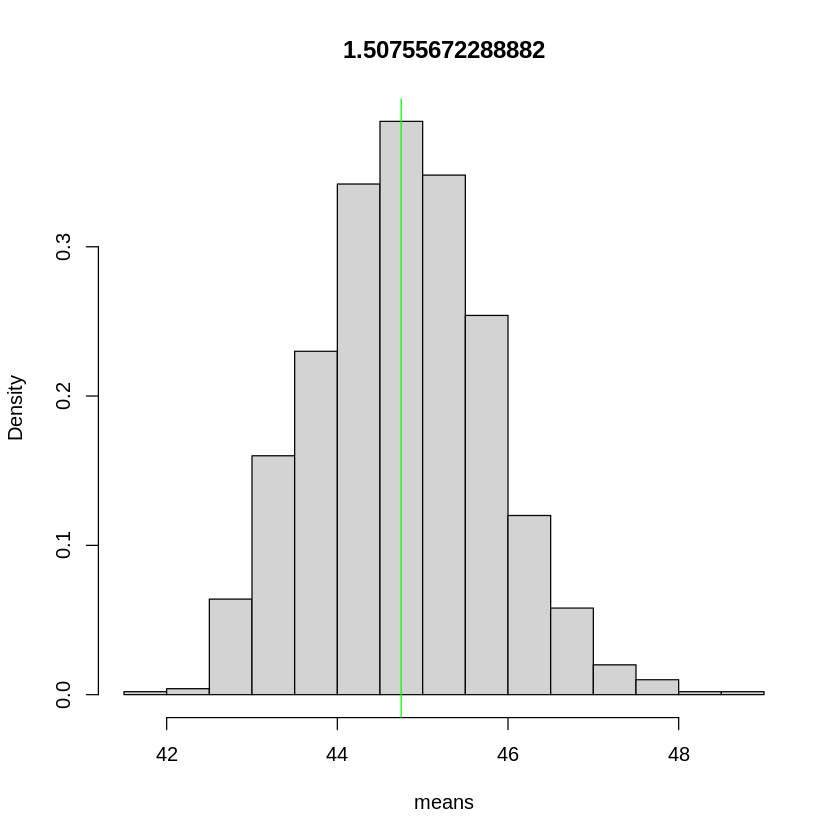

In [ ]:
# (c)

As = c(0.6/sqrt(11), 1/sqrt(11), 2/sqrt(11), 5/sqrt(11))
m = 1

for (a in As) {

  means = NULL

  for (j in 1:1000) {

    y = rnorm(i, m, a)
    num = m0(y)/dnorm(y, m, a)
    denom = m1()

    est = mean(num/denom)
    means = c(means, est)
    

  }
  hist(means, main = as.character(a), prob = T)
  abline(v = true(), col = 'green')


}




In [ ]:
# (d)

"""

a = 1/sqrt(11)
This seems to be the best value of a. The histogram produced gives values that are very close to the true value. I suspect that this value of a is extremely close to the actual value we are trying to simulate. 

a = 0.6/sqrt(11)
This seems to the next best value for a. The histogram produced shows the values are mostly very close to the true value. I suspect that this value of a is extremely close to the actual value we are trying to simulate. 

a = 2/sqrt(11), 5/sqrt(11)
These two values for a give reasonably distributed values that seem to be centered around the true value. 

"""

In [ ]:
# (e)

"""
I think that sampling from g(theta) makes more sense. When a = 0.6/sqrt(11), g(theta) gives values are very very close to the true value of the integral. I think this method is better than sampling from the prior.
"""

question 2

In [ ]:
# (a)


N = 1e3
n = 10
x_bar = 1


m0 = function(theta) {
  (exp(-(x_bar - theta)^2/(2/n)) * exp(-(theta - 1)^2/(2)))/(sqrt(2*pi*(1/n)*2*pi))
}

m1 = function() {
  (exp(-(x_bar - 0)^2/(2/n)))/(sqrt(2*pi*(1/n)))
}

true = function() {
  (sqrt(n+1)*exp(-0.5*((n*x_bar + 1)^2/(n+1) -1)))
}

y = rnorm(N, 1, 1)
num = m0(y)/dnorm(y, 1, 1)
denom = m1()

mean(num/denom)^-1
true()

[1] 0.02221372

[1] 0.02234724

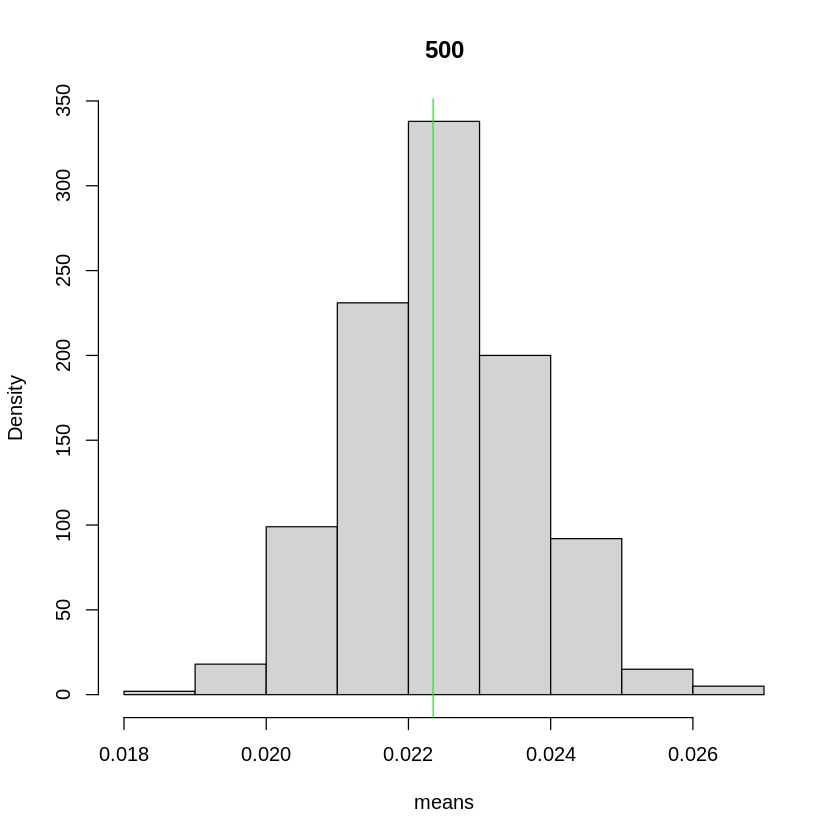

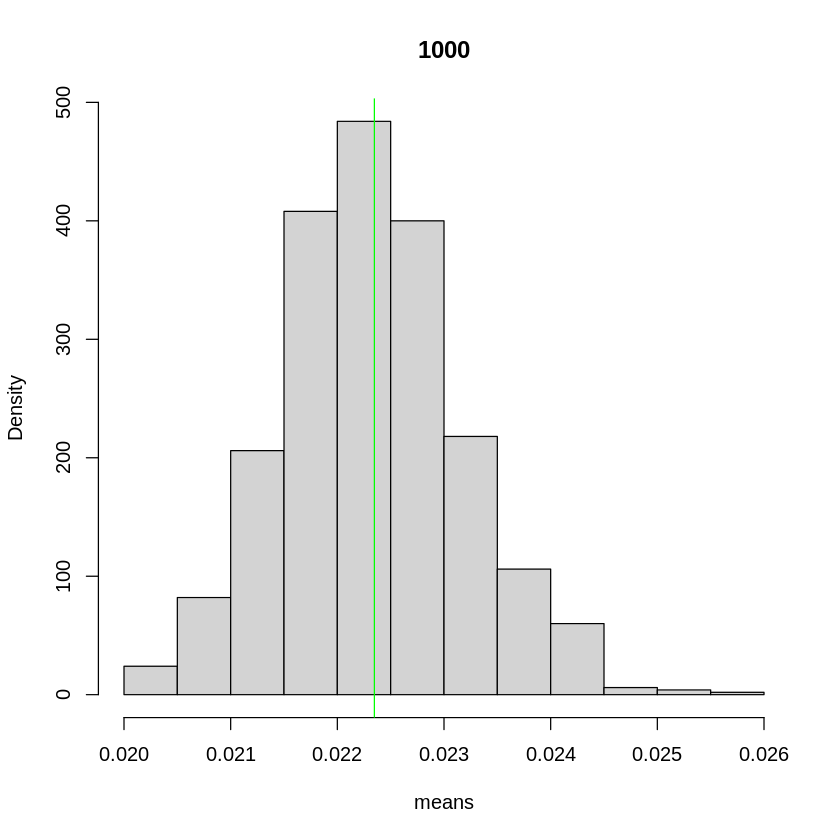

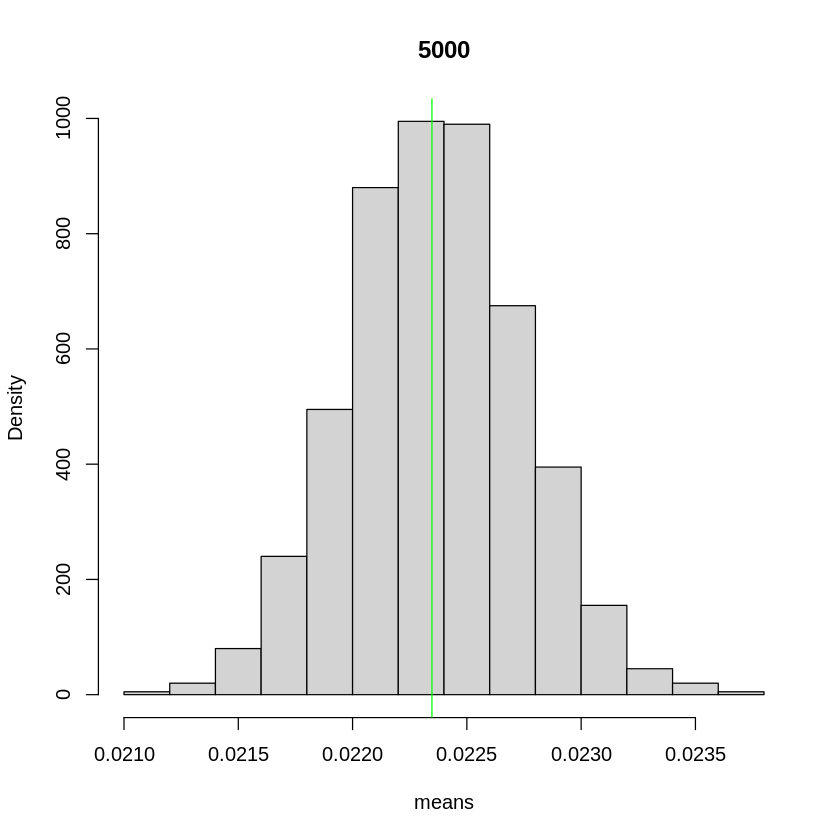

In [ ]:
# (b)


Ns = c(500, 1000, 5000)


for (i in Ns){ 

  means = NULL

  for (j in 1:1000) {

    y = rnorm(i, 1, 1)
    num = m0(y)/dnorm(y, 1, 1)
    denom = m1()

    est = mean(num/denom) ^-1  
    means = c(means, est)
    

  }
  hist(means, main = as.character(i), prob = T)
  abline(v = true(), col = 'green')
  
}